# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계3 : Text classification

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * Machine Learning
>> * [sklearn-tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
> * Deep Learning
>> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
>> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
>> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)
>> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,138 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 1. 개발 환경 설정

### 1-1. 라이브러리 설치

In [2]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 56.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 16.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=79158213661b6089bd9323947b60cb37623e906b7aa0e033477eda5b71be8a94
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [3]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget,os
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import wget,os

In [4]:
import tensorflow as tf
import numpy as np
import random
import os

def my_seed_everywhere(seed: int = 42):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

seed = 42
my_seed_everywhere(seed)

### 1-4. 구글드라이브 연결(Colab)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 전처리한 데이터 불러오기
* 1, 2일차에 전처리한 데이터를 불러옵니다.
* sparse data에 대해서는 scipy.sparse.load_npz 활용

In [16]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/NNG_NNP_SL/'
x_train = np.load(data_path + 'x_train.npy')
x_test = np.load(data_path + 'x_test.npy')
y_train = np.load(data_path + 'y_train.npy')
y_test = np.load(data_path + 'y_test.npy')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2964, 128), (742, 128), (2964,), (742,))

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2023, stratify=y_train)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2667, 128), (297, 128), (2667,), (297,))

In [18]:
# SVM 에 사용할 Scaled Data
max_words = 3943 - 1
x_train_scaled = x_train / max_words
x_val_scaled = x_val / max_words

In [31]:
x_train_ml = np.vstack((x_train, x_val))
y_train_ml = np.hstack((y_train, y_val))
x_train_ml.shape, y_train_ml.shape

((2964, 128), (2964,))

## 3. Machine Learning

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

### 3-1. Model 1

In [20]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from lightgbm import LGBMClassifier

In [32]:
%%time
model = LGBMClassifier(random_state=2023)
model.fit(x_train_ml, y_train_ml)

CPU times: user 3.23 s, sys: 47.9 ms, total: 3.28 s
Wall time: 1.7 s


LGBMClassifier(random_state=2023)

In [33]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.78      0.65       317
           1       0.36      0.24      0.29       147
           2       0.38      0.29      0.33       146
           3       0.57      0.34      0.42       112
           4       0.93      0.65      0.76        20

    accuracy                           0.51       742
   macro avg       0.56      0.46      0.49       742
weighted avg       0.49      0.51      0.48       742



### 3-2. Model 2

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
%%time
model = RandomForestClassifier(random_state=2023)
model.fit(x_train_ml, y_train_ml)

CPU times: user 742 ms, sys: 4.11 ms, total: 746 ms
Wall time: 747 ms


RandomForestClassifier(random_state=2023)

In [37]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.80      0.63       317
           1       0.23      0.15      0.18       147
           2       0.33      0.18      0.23       146
           3       0.35      0.24      0.29       112
           4       0.56      0.25      0.34        20

    accuracy                           0.45       742
   macro avg       0.40      0.32      0.34       742
weighted avg       0.40      0.45      0.40       742



### 3-3. Model 3

In [38]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.8 MB/s eta 0:00:00


In [39]:
from catboost import CatBoostClassifier

In [40]:
%%time
moel = CatBoostClassifier()
model.fit(x_train_ml, y_train_ml)
preds_class = model.predict(x_test)
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.53      0.80      0.63       317
           1       0.23      0.15      0.18       147
           2       0.33      0.18      0.23       146
           3       0.35      0.24      0.29       112
           4       0.56      0.25      0.34        20

    accuracy                           0.45       742
   macro avg       0.40      0.32      0.34       742
weighted avg       0.40      0.45      0.40       742

CPU times: user 852 ms, sys: 4.73 ms, total: 857 ms
Wall time: 862 ms


### 3-4. SVC

In [53]:
from sklearn.svm import SVC

In [61]:
scale_x_ml = np.vstack((x_train_scaled, x_val_scaled))

In [62]:
%%time
model = SVC()
model.fit(scale_x_ml, y_train_ml)

CPU times: user 1.1 s, sys: 1.5 ms, total: 1.1 s
Wall time: 1.09 s


SVC()

In [63]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60       317
           1       0.00      0.00      0.00       147
           2       0.00      0.00      0.00       146
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00        20

    accuracy                           0.43       742
   macro avg       0.09      0.20      0.12       742
weighted avg       0.18      0.43      0.26       742



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3-5. Hyperparameter Tuning(Optional) 
* Manual Search, Grid search, Bayesian Optimization, TPE...
> * [grid search tutorial sklearn](https://scikit-learn.org/stable/modules/grid_search.html)
> * [optuna tutorial](https://optuna.org/#code_examples)
> * [ray-tune tutorial](https://docs.ray.io/en/latest/tune/examples/tune-sklearn.html)

## 4. Deep Learning(Sequence)
* Sequence로 전처리한 데이터를 이용하여 DNN, 1-D CNN, LSTM 등 3가지 이상의 deep learning 모델 학습 및 성능 분석
> * [Google Tutorial](https://developers.google.com/machine-learning/guides/text-classification)
> * [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/text_classification)
> * [Keras-tutorial](https://keras.io/examples/nlp/text_classification_from_scratch/)

In [41]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### 4-1. DNN

In [64]:
# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(128, ))

hl = Dense(64, activation='swish')(il)
hl = Dense(128, activation='swish')(hl)
hl = Dense(256, activation='swish')(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 50,885
Trainable params: 50,885
Non-trainable params: 0
_________________________________________________________________


In [65]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
84/84 [==============================] - 2s 6ms/step - loss: 37.3370 - accuracy: 0.3048 - val_loss: 19.1030 - val_accuracy: 0.3199
Epoch 2/1000
84/84 [==============================] - 0s 4ms/step - loss: 11.3642 - accuracy: 0.3768 - val_loss: 13.4477 - val_accuracy: 0.3636
Epoch 3/1000
84/84 [==============================] - 0s 4ms/step - loss: 6.8382 - accuracy: 0.4304 - val_loss: 12.2209 - val_accuracy: 0.3232
Epoch 4/1000
84/84 [==============================] - 0s 4ms/step - loss: 4.6054 - accuracy: 0.4762 - val_loss: 10.2779 - val_accuracy: 0.3670
Epoch 5/1000
84/84 [==============================] - 0s 4ms/step - loss: 3.3344 - accuracy: 0.5084 - val_loss: 9.5903 - val_accuracy: 0.3434
Epoch 6/1000
84/84 [==============================] - 0s 4ms/step - loss: 2.4146 - accuracy: 0.5639 - val_loss: 9.6204 - val_accuracy: 0.3333
Epoch 7/1000
84/84 [==============================] - 0s 4ms/step - loss: 2.0993 - accuracy: 0.5894 - val_loss: 9.2987 - val_accuracy: 0.3367


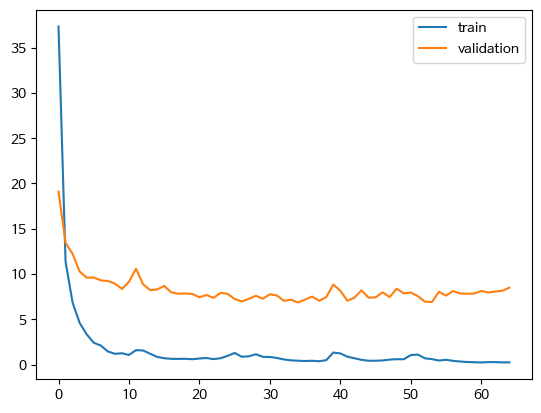

In [66]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [67]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 7.6066 - accuracy: 0.3477


[7.606574058532715, 0.34770888090133667]

In [70]:
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       317
           1       0.23      0.18      0.20       147
           2       0.20      0.18      0.19       146
           3       0.20      0.21      0.21       112
           4       0.00      0.00      0.00        20

    accuracy                           0.35       742
   macro avg       0.23      0.23      0.23       742
weighted avg       0.33      0.35      0.34       742

[[181  38  53  41   4]
 [ 64  27  30  24   2]
 [ 62  30  26  26   2]
 [ 48  19  20  24   1]
 [ 12   4   1   3   0]]


### 4-2. 1-D CNN

In [71]:
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(128,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = Conv1D(256, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)
hl = Flatten()(hl)
ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          504576    
                                                                 
 conv1d (Conv1D)             (None, 128, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 128)           41088     
                                                             

In [72]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
84/84 [==============================] - 18s 163ms/step - loss: 1.3981 - accuracy: 0.4282 - val_loss: 1.5706 - val_accuracy: 0.3131
Epoch 2/1000
84/84 [==============================] - 7s 80ms/step - loss: 1.0316 - accuracy: 0.5583 - val_loss: 1.0206 - val_accuracy: 0.6330
Epoch 3/1000
84/84 [==============================] - 6s 71ms/step - loss: 0.7585 - accuracy: 0.6880 - val_loss: 1.0559 - val_accuracy: 0.6263
Epoch 4/1000
84/84 [==============================] - 3s 38ms/step - loss: 0.5875 - accuracy: 0.7668 - val_loss: 1.1587 - val_accuracy: 0.6599
Epoch 5/1000
84/84 [==============================] - 3s 32ms/step - loss: 0.4507 - accuracy: 0.8215 - val_loss: 1.2223 - val_accuracy: 0.6397
Epoch 6/1000
84/84 [==============================] - 3s 31ms/step - loss: 0.3538 - accuracy: 0.8781 - val_loss: 1.7620 - val_accuracy: 0.6330
Epoch 7/1000
84/84 [==============================] - 3s 39ms/step - loss: 0.2748 - accuracy: 0.9051 - val_loss: 1.5430 - val_accuracy: 0.63

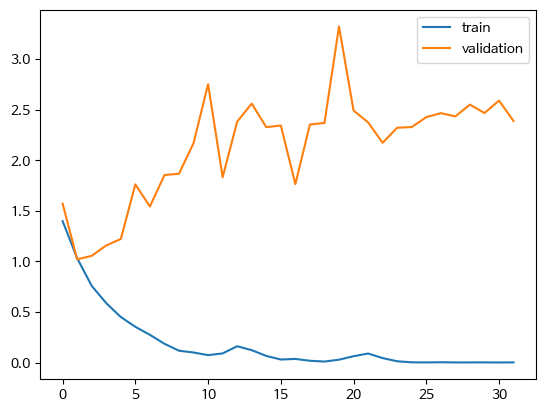

In [73]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [74]:
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       317
           1       0.43      0.61      0.50       147
           2       0.49      0.28      0.36       146
           3       0.64      0.63      0.64       112
           4       0.00      0.00      0.00        20

    accuracy                           0.63       742
   macro avg       0.47      0.47      0.46       742
weighted avg       0.62      0.63      0.62       742

[[268  17  29   3   0]
 [ 16  90  10  31   0]
 [ 48  54  41   3   0]
 [  3  35   3  71   0]
 [  1  15   1   3   0]]
24/24 [==============================] - 0s 5ms/step - loss: 0.9912 - accuracy: 0.6334


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.9912434220314026, 0.6334232091903687]

### 4-3. LSTM

In [75]:
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(128,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=True)(hl)
hl = LSTM(64, return_sequences=False)(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          504576    
                                                                 
 conv1d (Conv1D)             (None, 128, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64, 64)            33024     
                                                             

In [78]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
84/84 [==============================] - 22s 179ms/step - loss: 1.3191 - accuracy: 0.4278 - val_loss: 1.1525 - val_accuracy: 0.5253
Epoch 2/1000
84/84 [==============================] - 8s 98ms/step - loss: 0.9296 - accuracy: 0.5958 - val_loss: 0.9463 - val_accuracy: 0.6431
Epoch 3/1000
84/84 [==============================] - 5s 63ms/step - loss: 0.6661 - accuracy: 0.7394 - val_loss: 0.8825 - val_accuracy: 0.6599
Epoch 4/1000
84/84 [==============================] - 4s 47ms/step - loss: 0.5281 - accuracy: 0.8031 - val_loss: 0.9842 - val_accuracy: 0.6667
Epoch 5/1000
84/84 [==============================] - 4s 41ms/step - loss: 0.3971 - accuracy: 0.8620 - val_loss: 0.9637 - val_accuracy: 0.6768
Epoch 6/1000
84/84 [==============================] - 3s 33ms/step - loss: 0.3183 - accuracy: 0.8939 - val_loss: 1.0195 - val_accuracy: 0.6801
Epoch 7/1000
84/84 [==============================] - 3s 30ms/step - loss: 0.2504 - accuracy: 0.9186 - val_loss: 1.0646 - val_accuracy: 0.67

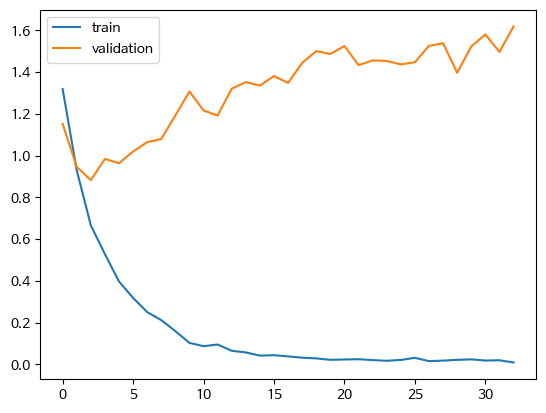

In [79]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [80]:
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model.evaluate(x_test, y_test)

24/24 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       317
           1       0.64      0.48      0.54       147
           2       0.41      0.50      0.45       146
           3       0.65      0.80      0.72       112
           4       0.00      0.00      0.00        20

    accuracy                           0.66       742
   macro avg       0.50      0.52      0.50       742
weighted avg       0.65      0.66      0.65       742

[[256   7  49   5   0]
 [ 10  70  49  18   0]
 [ 45  20  73   8   0]
 [  4  13   5  90   0]
 [  1   0   1  18   0]]
16/24 [===================>..........] - ETA: 0s - loss: 0.8826 - accuracy: 0.6523

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 7ms/step - loss: 0.8561 - accuracy: 0.6590


[0.8561397194862366, 0.6590296626091003]

### 4-4. Bidirectional

In [86]:
embedding_dim = 128

# 세션 클리어
K.clear_session()

# 모델 쌓기
il = Input(shape=(128,))
hl = Embedding(max_words, embedding_dim)(il)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = Conv1D(64, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
hl = MaxPool1D(2)(hl)

hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
hl = Flatten()(hl)

ol = Dense(5, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          504576    
                                                                 
 conv1d (Conv1D)             (None, 128, 64)           41024     
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 64, 128)           41088     
                                                             

In [87]:
my_seed_everywhere(seed)
es = EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=1000, callbacks=[es])

Epoch 1/1000
84/84 [==============================] - 29s 197ms/step - loss: 1.3088 - accuracy: 0.4458 - val_loss: 1.0646 - val_accuracy: 0.5791
Epoch 2/1000
84/84 [==============================] - 8s 95ms/step - loss: 0.8849 - accuracy: 0.6280 - val_loss: 1.0055 - val_accuracy: 0.6431
Epoch 3/1000
84/84 [==============================] - 7s 80ms/step - loss: 0.6440 - accuracy: 0.7405 - val_loss: 0.9199 - val_accuracy: 0.6734
Epoch 4/1000
84/84 [==============================] - 4s 47ms/step - loss: 0.4217 - accuracy: 0.8399 - val_loss: 0.9774 - val_accuracy: 0.7172
Epoch 5/1000
84/84 [==============================] - 4s 40ms/step - loss: 0.2477 - accuracy: 0.9070 - val_loss: 1.0396 - val_accuracy: 0.7205
Epoch 6/1000
84/84 [==============================] - 4s 46ms/step - loss: 0.1371 - accuracy: 0.9520 - val_loss: 1.2545 - val_accuracy: 0.7306
Epoch 7/1000
84/84 [==============================] - 4s 43ms/step - loss: 0.0966 - accuracy: 0.9685 - val_loss: 1.4851 - val_accuracy: 0.71

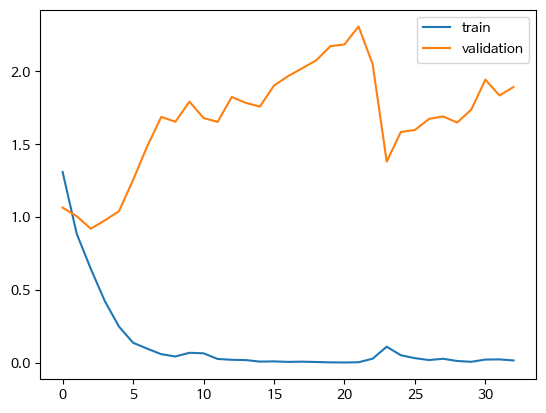

In [88]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [89]:
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

model.evaluate(x_test, y_test)

24/24 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       317
           1       0.61      0.62      0.61       147
           2       0.47      0.45      0.46       146
           3       0.69      0.69      0.69       112
           4       0.75      0.45      0.56        20

    accuracy                           0.69       742
   macro avg       0.67      0.61      0.63       742
weighted avg       0.69      0.69      0.69       742

[[271   7  35   4   0]
 [  9  91  31  16   0]
 [ 47  29  66   4   0]
 [  2  23   7  77   3]
 [  1   0   0  10   9]]
24/24 [==============================] - 0s 9ms/step - loss: 0.8500 - accuracy: 0.6927


[0.8499942421913147, 0.6927223801612854]

## 5. Using pre-trained model(Optional)
* 한국어 pre-trained model로 fine tuning 및 성능 분석
> * [BERT-tutorial](https://www.tensorflow.org/text/guide/bert_preprocessing_guide)
> * [HuggingFace-Korean](https://huggingface.co/models?language=korean)